# Object Detection Project 

## Russian License Plate Blurring

Welcome to your object detection project! Your goal will be to use Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files (unfortunately, it does not come with license detectors for other countries!)





In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read car image and display

In [28]:
img_car = cv2.imread('car_plate.jpg')

In [16]:
def display_img(img):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

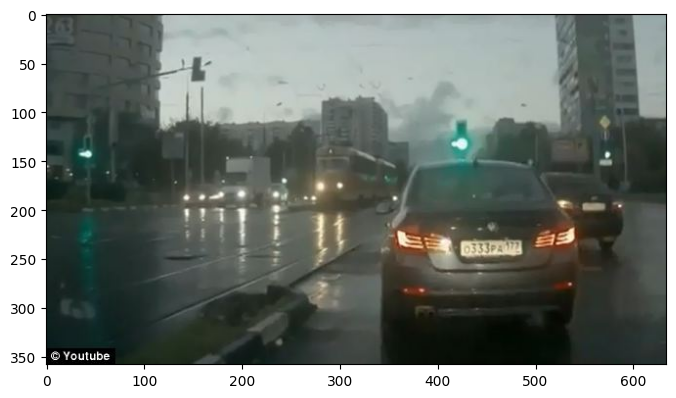

In [17]:
display_img(img_car)

## Load the haarcascade_russian_plate_number.xml file.

In [18]:
Car_plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

## processes an image and identifies the area containing a license plate by drawing a rectangle around it.

In [19]:
def detect_car_plate(img):
    plate_img = img.copy()
    plate_rects = Car_plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return plate_img

In [20]:
car_plate_rec = detect_car_plate(img_car)

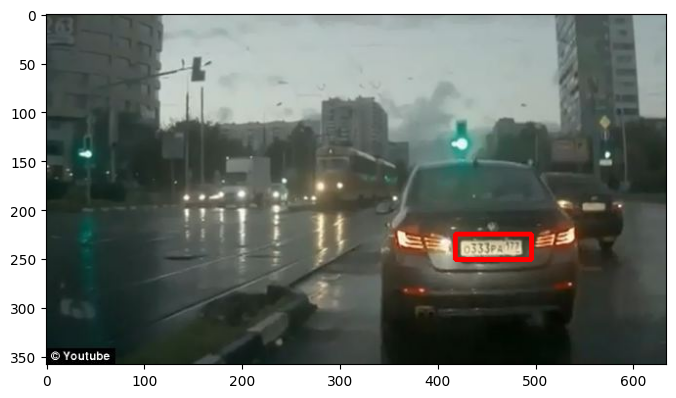

In [21]:
display_img(car_plate_rec)

## Modify the function to blur the detected license plate instead of simply drawing a rectangle around it.

In [24]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = Car_plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    for (x,y,w,h) in plate_rects: 
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [25]:
result = detect_and_blur_plate(img)

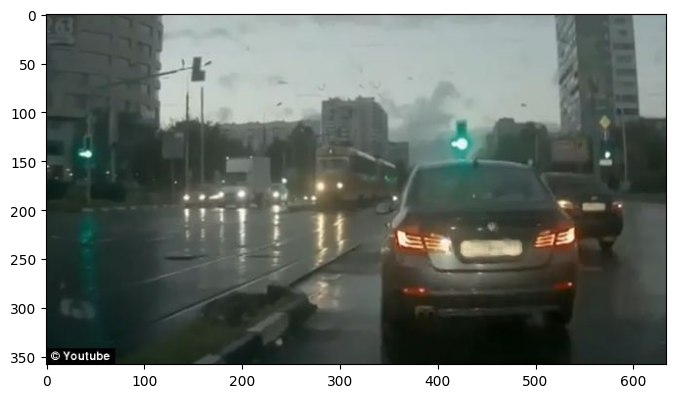

In [26]:
display(result)